# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables from .env file. Don't need to provide name example alpaca-key.env then load_dotenv() will work without passing the file name when in same root directory 
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD&format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD&format=json"

In [6]:
# Fetch current BTC price, extract response and convert to JSON 
btc_request_info = requests.get(btc_url)
btc_response = btc_request_info.content
btc_data = btc_request_info.json()

# Fetch current ETH price
eth_request_info = requests.get(eth_url)
eth_response = eth_request_info.content
eth_data = eth_request_info.json()


In [7]:
#Print btc_data
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19434218,
   'total_supply': 19434218,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 29941.0,
     'volume_24h': 8537769441,
     'market_cap': 581948369732,
     'percentage_change_1h': -0.206985092160132,
     'percentage_change_24h': -0.297126453583173,
     'percentage_change_7d': -1.34341232619401,
     'percent_change_1h': -0.206985092160132,
     'percent_change_24h': -0.297126453583173,
     'percent_change_7d': -1.34341232619401}},
   'last_updated': 1689824671}},
 'metadata': {'timestamp': 1689824671,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
#Print eth_data
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120196550,
   'total_supply': 120196550,
   'max_supply': 120196550,
   'quotes': {'USD': {'price': 1893.79,
     'volume_24h': 8861205514,
     'market_cap': 227723289493,
     'percentage_change_1h': -0.216582811975204,
     'percentage_change_24h': -0.916142251032587,
     'percentage_change_7d': 1.19649496324191,
     'percent_change_1h': -0.216582811975204,
     'percent_change_24h': -0.916142251032587,
     'percent_change_7d': 1.19649496324191}},
   'last_updated': 1689824675}},
 'metadata': {'timestamp': 1689824675,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [9]:
# Grab current price of crypto 
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35929.20
The current value of your 5.3 ETH is $10037.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")


In [20]:
# Format current date as ISO format
start_date_shares = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()
current_date_shares = pd.Timestamp("2023-07-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
close_price_df = alpaca_api.get_bars(tickers,  timeframe, start = start_date_shares, end = current_date_shares).df

# Reorganize the DataFrame
# Separate ticker data
AGG = close_price_df[close_price_df["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = close_price_df[close_price_df["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
combo_close_price_df = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

# change timestamp to date, set column as index and sort by date
combo_close_price_df.index = combo_close_price_df.index.date
# combo_close_price_df.sort_index(ascending=False)

# Preview DataFrame
combo_close_price_df.tail()

AGG                                                          \
             open     high     low  close   volume trade_count       vwap   
2023-07-11  96.94  97.0999  96.855  97.01  5978762       28609  96.979786   
2023-07-12  97.51  97.8499  97.450  97.80  7189081       23483  97.718226   
2023-07-13  98.18  98.4400  98.115  98.41  7458509       31270  98.343983   
2023-07-14  98.23  98.3100  97.920  97.94  7208357       21903  98.096753   
2023-07-17  97.95  98.1000  97.850  98.05  4689526       19745  97.991651   

                SPY                                                  \
               open      high     low   close    volume trade_count   
2023-07-11  440.450  442.9700  439.44  442.46  64479814      456582   
2023-07-12  446.390  447.4799  444.91  446.02  91949783      585806   
2023-07-13  447.900  450.3800  447.45  449.56  72425241      449368   
2023-07-14  450.475  451.3600  448.49  449.28  69730670      484025   
2023-07-17  449.130  451.9300  449.08  450.84  52680221      385755   

                        
                  vwap  
2023-07-11  441.225755  
2023-07-12  445.659246  
2023-07-13  448.598241  
2023-07-14  449.818675  
2023-07-17  450.464377

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(combo_close_price_df["AGG"]["close"][-1])
spy_close_price = float(combo_close_price_df["SPY"]["close"][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.05
Current SPY closing price: $450.84


In [14]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22542.00
The current value of your 200 AGG shares is $19610.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
shares_assets = my_spy_value + my_agg_value
asset_data = {'Amount': [crypto_assets, shares_assets]}

# Create savings DataFrame
savings_df = pd.DataFrame(asset_data, index=['crypto', 'shares'], columns=['Amount'])

# Display savings DataFrame
display(savings_df)

,Amount
crypto,45966.287
shares,42152.000


<AxesSubplot:title={'center':'Composition of Personal Saving'}, ylabel='Amount'>

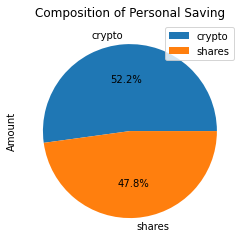

In [16]:
# Plot savings pie chart
savings_df.plot.pie(y="Amount", autopct='%1.1f%%', title="Composition of Personal Saving")


In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_assets = crypto_assets + shares_assets

# Validate saving health
if total_assets > emergency_fund:
    print("Congratulations! There is enough money in your emergency fund.")
elif emergency_fund == total_assets:
    print("Congratulations! You have reached this financial goal")
else:
    print(f"You are {emergency_fund - total_assets} dollars away from reaching the goal")  

Congratulations! There is enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
stock_historical_df = alpaca_api.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG_historical = stock_historical_df[stock_historical_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY_historical = stock_historical_df[stock_historical_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
combo_stock_historical_df = pd.concat([AGG_historical, SPY_historical],axis=1, keys=["AGG","SPY"])

# change timestamp to date, set column as index and sort by date
combo_stock_historical_df.index = combo_stock_historical_df.index.date
# combo_close_price_df.sort_index(ascending=False)

# Preview DataFrame
combo_stock_historical_df.tail()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2021-04-26  114.74  114.8015  114.65  114.65  3480303       13520  114.706244   
2021-04-27  115.13  115.1300  114.37  114.37  3820640       12720  114.498315   
2021-04-28  114.45  114.4685  114.20  114.43  7075831       24303  114.379810   
2021-04-29  114.14  114.3700  114.09  114.37  6208142       21096  114.250702   
2021-04-30  114.41  114.5150  114.33  114.49  6469432       19582  114.456246   

               SPY                                                              
              open    high       low   close    volume trade_count        vwap  
2021-04-26  417.44  418.22  416.8111  417.61  51824860      295870  417.508245  
2021-04-27  417.93  418.14  416.3000  417.52  50297139      296300  417.481360  
2021-04-28  417.81  419.01  416.9000  417.40  50692781      330049  417.742098  
2021-04-29  420.32  420.72  416.4400  420.06  76965583      443396  418.824046  
2021-04-30  417.63  418.54  416.3400  417.30  84731942      478844  417.651995

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = combo_stock_historical_df, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*30)

In [25]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                                        SPY                            \
                  vwap daily_return    open    high     low     close   
2016-05-02  110.627199          NaN  206.92  208.18  206.41  207.9700   
2016-05-03  110.865995     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04  110.879063     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05  111.028363     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06  111.031967    -0.001530  204.08  205.77  203.88  205.7200   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.008707  
2016-05-04   92199810      345261  205.090172    -0.005574  
2016-05-05   67597222      280622  205.141555    -0.000195  
2016-05-06   89131004      340335  204.937074     0.003659

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jaliu/Documents/Fintech/homework/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999435,1.002709,1.001285,1.002720,0.996841,0.996734,0.998351,1.005585,0.988839,0.993020,...,0.991841,1.010436,1.003149,1.006020,1.000079,0.992904,1.001517,0.996711,1.002256,1.002985
2,1.006185,1.002130,1.009343,1.006985,0.994806,0.999372,0.988537,1.009813,0.989450,0.983046,...,0.993114,1.012687,0.996191,1.012846,0.994379,0.996489,0.994509,1.002381,0.994442,1.005430
3,1.006690,0.993949,1.006680,1.019409,1.000267,0.999065,0.985003,1.013139,0.993405,0.979837,...,1.000855,1.013924,0.999047,1.008270,1.003487,0.998992,1.000024,0.995287,0.989836,1.014082
4,1.015408,1.003345,1.008940,1.020947,1.006010,0.994414,0.983353,1.004493,0.993402,0.982058,...,0.997412,1.021653,1.000455,1.008538,1.001541,0.994507,0.992486,1.004569,0.993965,1.020013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.830693,20.630941,77.248159,5.138633,19.931800,9.178437,11.724160,10.142629,9.184557,8.692639,...,6.296366,17.626176,3.186367,9.994207,11.350846,28.166671,8.804629,3.635466,19.342970,14.594810
7557,10.794097,20.495164,77.551741,5.163383,20.022100,9.149223,11.628886,9.952471,9.258204,8.715466,...,6.288003,17.660774,3.193929,9.991331,11.294466,27.865864,8.804688,3.622125,19.429393,14.712231
7558,10.762137,20.336247,77.493732,5.220085,20.285558,9.120904,11.672185,9.861120,9.358998,8.704367,...,6.290388,17.544751,3.182134,9.928544,11.436942,27.965513,8.878649,3.626957,19.156739,14.731048
7559,10.746248,20.159950,76.910057,5.171223,20.302759,9.052670,11.660868,9.802062,9.313205,8.684346,...,6.409187,17.687981,3.191871,10.015515,11.388855,28.012562,8.920476,3.621131,19.076757,14.742629


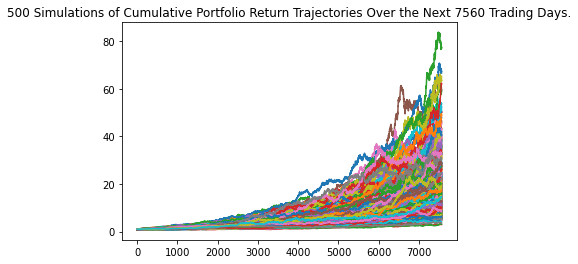

In [27]:
# Plot simulation outcomes

simulation_plot = MC_30_year.plot_simulation()

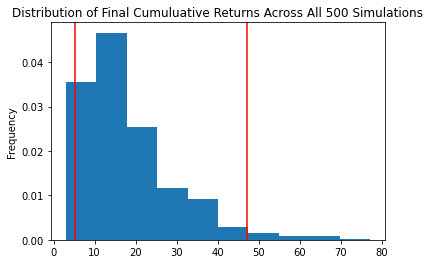

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mc_simulation = MC_30_year.summarize_cumulative_return()

# Print summary statistics
summary_mc_simulation

count           500.000000
mean             18.128225
std              11.376486
min               2.991676
25%              10.111167
50%              14.806567
75%              22.871254
max              77.179057
95% CI Lower      5.200682
95% CI Upper     47.219133
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
range_lower_20k = round(summary_mc_simulation[8]*20000,2)
range_upper_20k = round(summary_mc_simulation[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${range_lower_20k} and ${range_upper_20k}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $104013.64 and $944382.67


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
range_lower_30k = round(summary_mc_simulation[8]*30000,2)
range_upper_30k = round(summary_mc_simulation[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${range_lower_30k} and ${range_upper_30k}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $156020.46 and $1416574.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = combo_stock_historical_df, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*5)

In [36]:
#print dataframe 
MC_5_year.portfolio_data.head()

AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                                        SPY                            \
                  vwap daily_return    open    high     low     close   
2016-05-02  110.627199          NaN  206.92  208.18  206.41  207.9700   
2016-05-03  110.865995     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04  110.879063     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05  111.028363     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06  111.031967    -0.001530  204.08  205.77  203.88  205.7200   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.008707  
2016-05-04   92199810      345261  205.090172    -0.005574  
2016-05-05   67597222      280622  205.141555    -0.000195  
2016-05-06   89131004      340335  204.937074     0.003659

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jaliu/Documents/Fintech/homework/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994824,0.999323,0.994515,1.002094,1.009476,1.001341,1.005688,0.996514,1.000718,0.998032,...,1.000286,1.002867,1.004099,0.998822,0.998191,0.999283,1.003230,0.994180,1.012814,0.991295
2,0.993724,0.993061,0.998927,1.016204,1.001094,1.002878,1.002940,1.000452,0.995701,0.995735,...,0.993087,0.998823,0.995746,1.002027,1.002619,1.006545,0.994781,0.999236,1.023745,0.984313
3,0.990833,0.990456,0.998241,1.021558,1.000093,1.009365,1.008725,0.993095,1.001091,0.996719,...,0.995838,1.007251,0.989761,1.003180,1.012991,1.003851,0.992847,0.993560,1.031149,0.990881
4,0.996916,0.990090,1.001395,1.025568,1.010376,1.006120,1.004869,0.993358,1.007347,0.987959,...,0.994647,1.001585,0.995545,0.997553,0.998468,1.003968,1.001546,0.994074,1.034154,0.986549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.942343,1.657419,1.561026,1.582681,1.704944,1.256236,1.336297,2.675012,1.391722,1.931502,...,1.848497,1.547505,1.039773,1.667359,0.967246,1.032667,1.197230,1.972239,1.322321,0.978523
1257,1.933666,1.659902,1.547807,1.585001,1.708337,1.255715,1.348736,2.712756,1.381303,1.908294,...,1.862533,1.547330,1.042357,1.647981,0.977090,1.032625,1.193811,1.984745,1.317588,0.984733
1258,1.937814,1.668347,1.556228,1.571530,1.703709,1.251647,1.348800,2.701557,1.413877,1.930378,...,1.871187,1.552225,1.038785,1.655275,0.966401,1.043643,1.193455,2.010342,1.322366,0.985107
1259,1.941174,1.651877,1.563888,1.564273,1.702535,1.254641,1.344881,2.699912,1.428440,1.934989,...,1.871037,1.564421,1.033271,1.651542,0.963266,1.036718,1.184550,2.005449,1.328058,0.982134


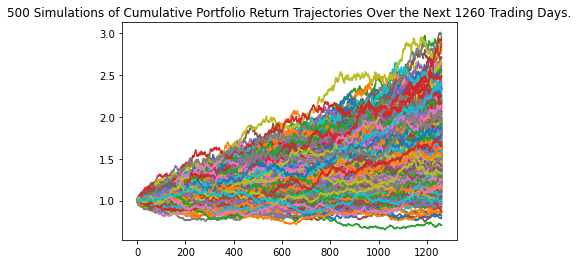

In [39]:
# Plot simulation outcomes
simulation_plot_5 = MC_5_year.plot_simulation()

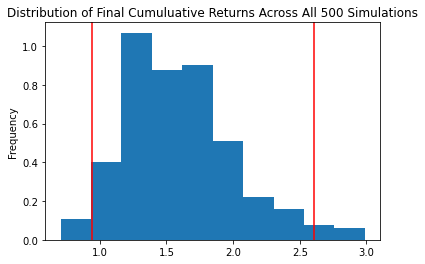

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_5_year.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mc_simulation_5 = MC_5_year.summarize_cumulative_return()

# Print summary statistics
summary_mc_simulation_5

count           500.000000
mean              1.596702
std               0.413083
min               0.704814
25%               1.297638
50%               1.556447
75%               1.833034
max               2.988500
95% CI Lower      0.941440
95% CI Upper      2.606117
Name: 1260, dtype: float64

In [42]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
range_lower_60k_5 = round(summary_mc_simulation_5[8]*60000,2)
range_upper_60k_5 = round(summary_mc_simulation_5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${range_lower_60k_5} and ${range_upper_60k_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56486.42 and $156367.05


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = combo_stock_historical_df, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*10)

In [ ]:
#print dataframe 
MC_10_year.portfolio_data.head()

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jaliu/Documents/Fintech/homework/financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990948,1.000752,0.997333,1.001614,1.000421,1.002218,0.990480,1.009641,1.005139,1.006421,...,1.007006,0.997558,1.006308,1.001998,0.999742,0.998903,1.017499,1.000335,1.016825,1.013784
2,0.987517,0.986152,1.002179,1.003065,0.996057,1.005225,0.999881,1.012799,1.008297,0.994577,...,1.014744,0.987886,1.003533,0.989747,0.991648,1.000122,1.017898,1.007510,1.021836,1.016271
3,0.991920,0.983123,0.998916,1.003893,0.997552,0.989926,0.991517,1.005806,1.017532,1.005637,...,1.009621,0.979886,1.011013,0.987519,0.994698,1.001566,1.016545,1.007558,1.019414,1.019152
4,0.982338,0.977450,0.999944,1.009499,1.001142,0.996226,0.990540,1.009908,1.027633,1.002295,...,1.014972,0.985562,1.012081,0.983920,1.004500,0.995535,1.009061,0.999450,1.022484,1.021320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.898447,3.477946,1.538686,3.654796,2.183175,2.015116,2.225486,1.811282,3.824800,1.773016,...,2.997122,2.129983,2.714440,1.208383,3.032022,1.798054,3.033935,3.705650,1.632286,1.455024
2517,1.893552,3.505974,1.547542,3.648784,2.155646,2.030703,2.221398,1.807833,3.828292,1.808425,...,3.003969,2.121625,2.695205,1.222716,3.039855,1.798421,3.064520,3.678964,1.616264,1.461302
2518,1.889574,3.484519,1.538245,3.647175,2.180534,2.037894,2.201537,1.813593,3.854171,1.798553,...,3.011107,2.123776,2.710218,1.232575,2.997275,1.789680,3.052356,3.651900,1.620359,1.459494
2519,1.867625,3.491042,1.538446,3.724040,2.173614,2.027870,2.211580,1.832067,3.903883,1.815180,...,3.026964,2.111130,2.691059,1.231346,3.033582,1.807412,3.059937,3.642009,1.613122,1.459517


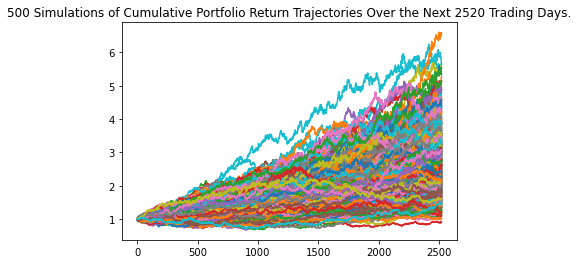

In [45]:
# Plot simulation outcomes
simulation_plot_10 = MC_10_year.plot_simulation()

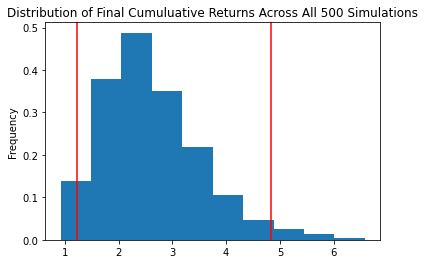

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10_year.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mc_simulation_10 = MC_10_year.summarize_cumulative_return()

# Print summary statistics
summary_mc_simulation_10

count           500.000000
mean              2.609601
std               0.906532
min               0.921920
25%               1.971426
50%               2.443207
75%               3.125744
max               6.577522
95% CI Lower      1.224903
95% CI Upper      4.826763
Name: 2520, dtype: float64

In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
range_lower_60k_10 = round(summary_mc_simulation_5[8]*60000,2)
range_upper_60k_10 = round(summary_mc_simulation_5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${range_lower_60k_10} and ${range_upper_60k_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56486.42 and $156367.05
